In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HDBflat_value.csv')
### Historical data of Singapore HDB Resale prices
### are available at https://data.gov.sg/collections/189/view
df.head()

,year,flat_type,height,floor_area_sqm,remaining_lease,district_C,district_N,district_E,district_S,district_W,Improved,Model_A,New_Gen,Premium,Simplified,resale_price,resale_price_persqm,persqm_price_exceed_6500
0,2017,4 ROOM,3,82,63.500000,1,0,0,0,0,1,0,0,0,0,385000.0,4695.121951,0
1,2017,4 ROOM,6,83,61.666667,1,0,0,0,0,1,0,0,0,0,620000.0,7469.879518,1
2,2017,4 ROOM,6,85,63.583333,1,0,0,0,0,1,0,0,0,0,400000.0,4705.882353,0
3,2017,4 ROOM,6,83,61.500000,1,0,0,0,0,1,0,0,0,0,668000.0,8048.192771,1
4,2017,4 ROOM,9,83,62.000000,1,0,0,0,0,1,0,0,0,0,650000.0,7831.325301,1


In [3]:
df = df.drop(columns=['flat_type', 'resale_price', 'persqm_price_exceed_6500'])
### delete 'district_E' and 'Simplified' columns as they create col dependencies
df = df.drop(columns=['district_E', 'Simplified'])
df.isnull().sum()  
### this is to check if there is any missing data in the index
###  and other columns -- none or '0'

year                   0
height                 0
floor_area_sqm         0
remaining_lease        0
district_C             0
district_N             0
district_S             0
district_W             0
Improved               0
Model_A                0
New_Gen                0
Premium                0
resale_price_persqm    0
dtype: int64

In [4]:
### Convert 'year' to no. of years after 2016
df['year'] = df['year'] - 2016

In [5]:
df=df.iloc[:,0:13]
df.head()

,year,height,floor_area_sqm,remaining_lease,district_C,district_N,district_S,district_W,Improved,Model_A,New_Gen,Premium,resale_price_persqm
0,1,3,82,63.500000,1,0,0,0,1,0,0,0,4695.121951
1,1,6,83,61.666667,1,0,0,0,1,0,0,0,7469.879518
2,1,6,85,63.583333,1,0,0,0,1,0,0,0,4705.882353
3,1,6,83,61.500000,1,0,0,0,1,0,0,0,8048.192771
4,1,9,83,62.000000,1,0,0,0,1,0,0,0,7831.325301


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62359 entries, 0 to 62358
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 62359 non-null  int64  
 1   height               62359 non-null  int64  
 2   floor_area_sqm       62359 non-null  int64  
 3   remaining_lease      62359 non-null  float64
 4   district_C           62359 non-null  int64  
 5   district_N           62359 non-null  int64  
 6   district_S           62359 non-null  int64  
 7   district_W           62359 non-null  int64  
 8   Improved             62359 non-null  int64  
 9   Model_A              62359 non-null  int64  
 10  New_Gen              62359 non-null  int64  
 11  Premium              62359 non-null  int64  
 12  resale_price_persqm  62359 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.2 MB


In [7]:
# Let's summarize the data to see the distribution of data
print(df.describe())
### 62,359 rows of data or cases from year 2017 thru 2023 (may not
###  be complete data collected here). 'flat_type' all 4-Room.  

               year        height  floor_area_sqm  remaining_lease  \
count  62359.000000  62359.000000    62359.000000     62359.000000   
mean       4.214516      9.757469       95.475232        78.488792   
std        1.968071      5.589792        6.857665        13.050042   
min        1.000000      3.000000       75.000000        45.750000   
25%        3.000000      6.000000       92.000000        66.416667   
50%        4.000000      9.000000       93.000000        78.500000   
75%        6.000000     12.000000      102.000000        92.666667   
max        7.000000     36.000000      133.000000        97.166667   

         district_C    district_N    district_S    district_W      Improved  \
count  62359.000000  62359.000000  62359.000000  62359.000000  62359.000000   
mean       0.004169      0.617393      0.064289      0.238618      0.020478   
std        0.064437      0.486027      0.245269      0.426242      0.141630   
min        0.000000      0.000000      0.000000      

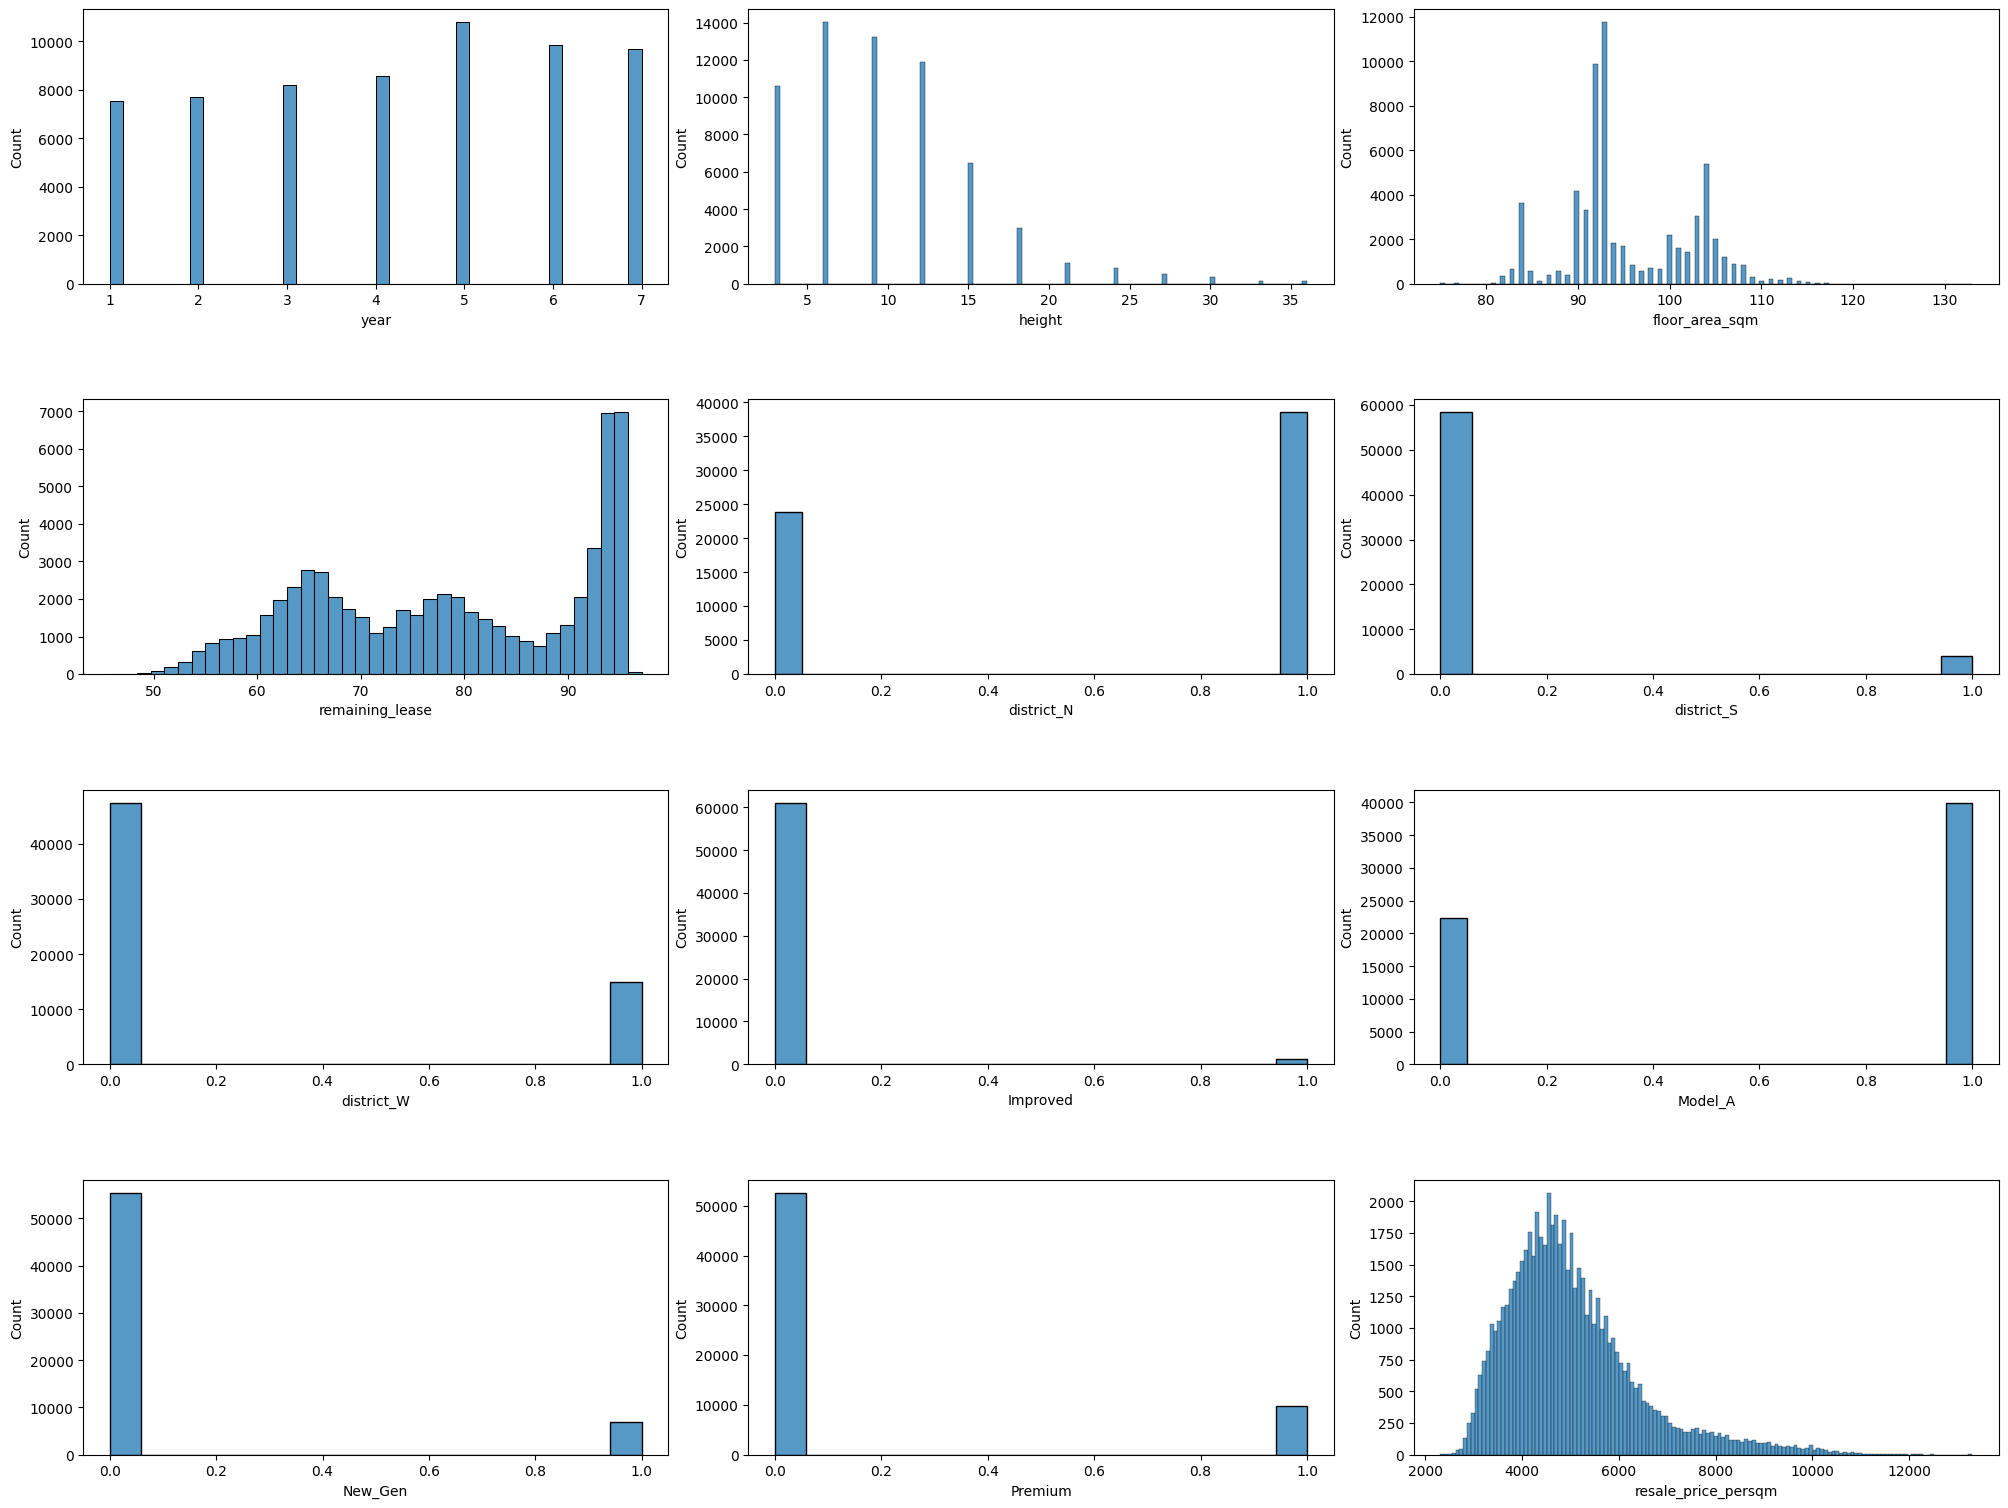

In [8]:
### Proportion of '1''s in 'district_C' is very small, so we left out of graph
df1 = df.drop(columns=['district_C'])

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df1.items():
   sns.histplot(v, ax=axs[index])
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### uses seaborn

<Axes: >

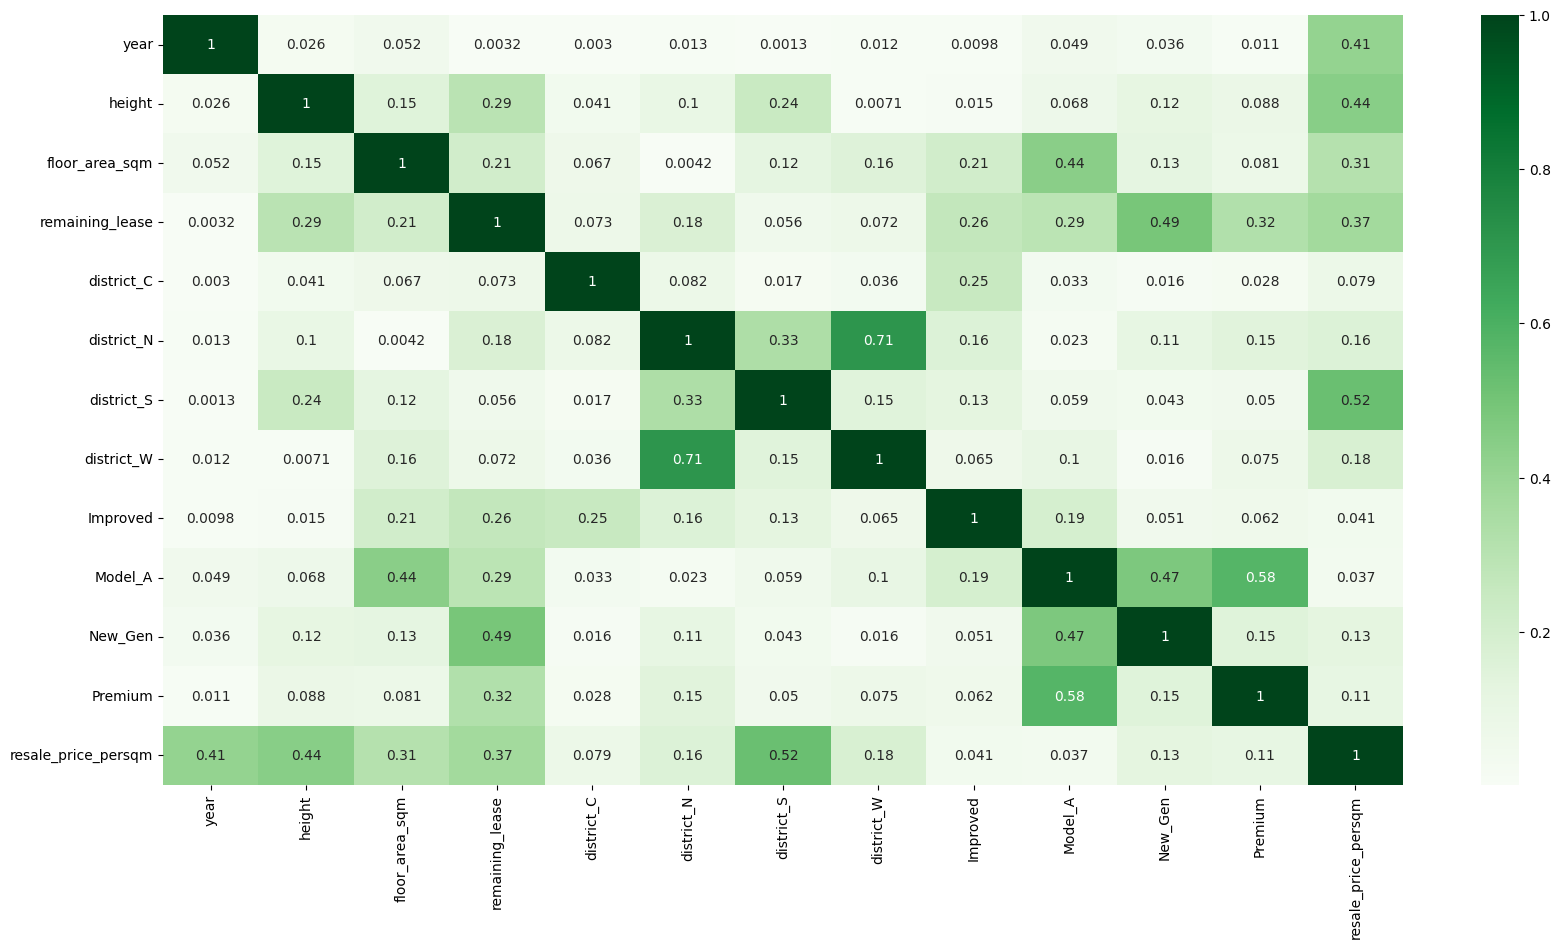

In [9]:
### pairwise correlation on the features including 'resale_price_persqm'
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True, cmap="Greens" )
### In heat map, clearly tax and rad are highly correlated
### For more options - see https://seaborn.pydata.org/generated
###  /seaborn.heatmap.html

In [10]:
### Here we define the target var y and the features X
X = df.loc[:,['year','height','floor_area_sqm','remaining_lease',\
              'district_C','district_N','district_S','district_W',\
              'Improved','Model_A','New_Gen','Premium']]
y = df['resale_price_persqm']

In [11]:
### Splitting dataset into Training set 60%, Validation Set 20% and Test set 20%
from sklearn.model_selection import train_test_split
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = 0.4, \
                                                    random_state = 37) 
### X_valtest and y_valtest contains 20% validation and 20% test data
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size = 0.5, \
                                                    random_state = 14) 
len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(37415, 37415, 12472, 12472, 12472, 12472)

# Linear Regression: training R^2, RMSE; validation R^2, RMSE

In [12]:
### see module documentation in https://scikit-learn.org/stable/modules
###  /generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression()  
Linreg.fit(X_train, y_train) 
### To retrieve the intercept:
print('Intercept (train):', Linreg.intercept_)
### To retrieving the slope:
print('Slopes (train):', Linreg.coef_)

from sklearn.metrics import r2_score
y_pred_Linreg_train = Linreg.predict(X_train)
### 'y_pred_Linreg_train' is predicted y using the x_train data
r2_score_Linreg_train = r2_score(y_train, y_pred_Linreg_train)
### r2_score_Linreg_train is R-sq in lin reg involving training data set
print('Linreg_train_R2_score: ', r2_score_Linreg_train)

Intercept (train): 3422.055996603822
Slopes (train): [  281.167182      53.05749049   -19.83328235    32.31417559
  1295.99801638  -972.2729605   1601.62306092 -1088.95040275
  -261.64604368   -18.87466348   125.04386431    94.53231616]
Linreg_train_R2_score:  0.6721950473196399


In [13]:
from sklearn.metrics import mean_squared_error
### Predicting RMSE -- the Training set results
rmse_Linreg_train = (np.sqrt(mean_squared_error(y_train, y_pred_Linreg_train)))
print("Linreg_train_RMSE: ", rmse_Linreg_train)

Linreg_train_RMSE:  786.2624684200343


In [14]:
### Check the R2_score(train) another way
import numpy as np
def tss(y_train):
    return ((y_train - np.mean(y_train))**2).sum()
1-(37415*(rmse_Linreg_train)**2)/tss(y_train)  
### note that rmse in Linreg divides into N, not N-k

0.6721950473196399

In [15]:
### Predicting R2 Score using Validation Set but Intercept(train) 
###  and Slopes(train) from Training results
y_pred_Linreg_val = Linreg.intercept_ + np.dot(X_val,Linreg.coef_.T)

r2_score_Linreg_val = r2_score(y_val, y_pred_Linreg_val)
### r2_score_Linreg_val is R-sq in lin reg involving validation data set
print('Linreg_val_R2_score: ', r2_score_Linreg_val)

rmse_Linreg_val = (np.sqrt(mean_squared_error(y_val, y_pred_Linreg_val)))
print("Linreg_val_RMSE:",rmse_Linreg_val)

Linreg_val_R2_score:  0.694525671834225
Linreg_val_RMSE: 769.1847041142489


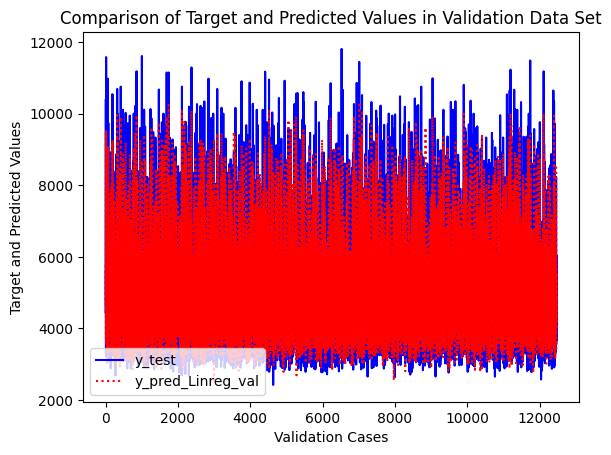

In [16]:
import matplotlib.pyplot as plt
d = np.linspace(1, 12472, 12472)
### creates t ranging from values 1 to 3930 with number of points (3rd argument) as 3930

plt.plot(d, y_val, 'blue', linestyle='solid') ### plotting d, y_val separately 
plt.plot(d, y_pred_Linreg_val, 'red', linestyle='dotted') ### plotting t, y_pred separately 
plt.xlabel('Validation Cases')
plt.ylabel('Target and Predicted Values')
plt.title('Comparison of Target and Predicted Values in Validation Data Set')
plt.legend(["y_test", "y_pred_Linreg_val"], loc ="lower left")
plt.show()
### See linestyles in https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
### See also https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

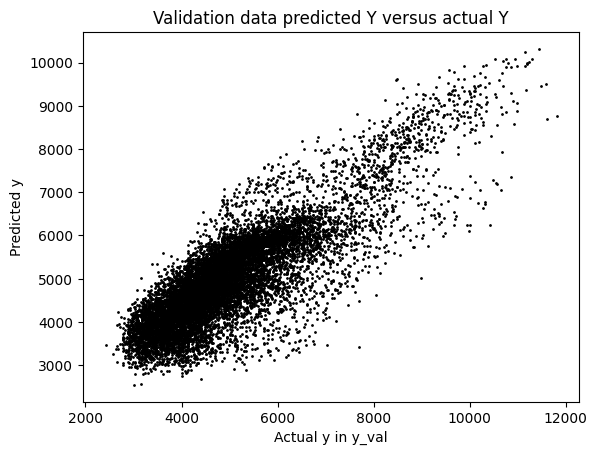

In [17]:
### A scatterplot may be clearer - here matplotlib
plt.scatter(y_val, y_pred_Linreg_val,s=1,color='black')
plt.title("Validation data predicted Y versus actual Y")
plt.xlabel("Actual y in y_val")
plt.ylabel("Predicted y")
plt.show()

In [18]:
### Next we show regularized regressions. Here because there are
### hyperparameters. The training set is used at the same time to
### train for optimal hyperparameters with scoring on validation set

# Ridge

In [19]:
from sklearn import linear_model
from sklearn.metrics import r2_score

base = 0.6

num = 0.0
while num < 5.0:
 
    Ridge=linear_model.Ridge(alpha=num,)
    Ridge.fit(X_train, y_train) 

    y_pred_Ridge_val = Ridge.intercept_ + np.dot(X_val,Ridge.coef_.T)
    r2_score_Ridge_val = r2_score(y_val, y_pred_Ridge_val)
    rmse_y_pred_Ridge_val = (np.sqrt(mean_squared_error(y_val, y_pred_Ridge_val)))

    if r2_score_Ridge_val > base:
        base = r2_score_Ridge_val
        alpha_Ridge = num
        RI = Ridge.intercept_
        RC = Ridge.coef_
        RMSE = rmse_y_pred_Ridge_val
    num = num + 0.01

print("OPTIMAL HYPERPARAMETER in VALIDATION SCORE")
print("alpha:", alpha_Ridge)
print('Intercept (train):', RI)
print('Slopes (train):', RC)
print("r2_score_Ridge_validation:", base)
print("Pred_RMSE_Ridge_validation:", RMSE)

OPTIMAL HYPERPARAMETER in VALIDATION SCORE
alpha: 3.5399999999999685
Intercept (train): 3425.5577924907766
Slopes (train): [  281.13954996    53.10300082   -19.86813128    32.30366725
  1262.57317609  -972.43971792  1597.96984447 -1088.88032408
  -255.83874467   -18.01989755   125.29255267    95.05039738]
r2_score_Ridge_validation: 0.6945282132520313
Pred_RMSE_Ridge_validation: 769.1815044611375


# Lasso

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score

base = 0.6

num = 0.0
while num < 0.3:
 
    Lasso=linear_model.Lasso(alpha=num,)
    Lasso.fit(X_train, y_train) 

    y_pred_Lasso_val = Lasso.intercept_ + np.dot(X_val,Lasso.coef_.T)
    r2_score_Lasso_val = r2_score(y_val, y_pred_Lasso_val)
    rmse_y_pred_Lasso_val = (np.sqrt(mean_squared_error(y_val, y_pred_Lasso_val)))

    if r2_score_Lasso_val > base:
        base = r2_score_Lasso_val
        alpha_Lasso = num
        LI = Lasso.intercept_
        LC = Lasso.coef_
        RMSE = rmse_y_pred_Lasso_val
    num = num + 0.001

print("OPTIMAL HYPERPARAMETER in VALIDATION SCORE")
print("alpha:", alpha_Lasso)
print('Intercept (train):', LI)
print('Slopes (train):', LC)
print("r2_score_Lasso_validation:", base)
print("Pred_RMSE_Lasso_validation:", RMSE)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+10, tolerance: 7.056e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

OPTIMAL HYPERPARAMETER in VALIDATION SCORE
alpha: 0.04300000000000003
Intercept (train): 3420.4820939032197
Slopes (train): [  281.15356589    53.07079852   -19.8268077     32.32253673
  1283.35605292  -971.77259527  1600.85485195 -1088.3703868
  -257.48300225   -18.99733798   124.73335914    93.93814603]
r2_score_Lasso_validation: 0.6945260996464644
Pred_RMSE_Lasso_validation: 769.1841654982089


# Elastic Net

In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score

base = 0.6

num1 = 0.0
while num1 < 0.1:

    num2 = 0.0
    while num2 < 1.0:
 
        ELNet=linear_model.ElasticNet(alpha=num1,l1_ratio=num2)
        ELNet.fit(X_train, y_train) 

        y_pred_ELNet_val = ELNet.intercept_ + np.dot(X_val,ELNet.coef_.T)
        r2_score_ELNet_val = r2_score(y_val, y_pred_ELNet_val)
        rmse_y_pred_ELNet_val = (np.sqrt(mean_squared_error(y_val, y_pred_ELNet_val)))

        if r2_score_ELNet_val > base:
            base = r2_score_ELNet_val
            alpha_EN = num1
            l1_ratio_EN = num2
            EI = ELNet.intercept_
            EC = ELNet.coef_
            RMSE = rmse_y_pred_ELNet_val
    
        num2 = num2 + 0.1
    num1 = num1 + 0.001

print("OPTIMAL HYPERPARAMETER in VALIDATION SCORE")
print("alpha:", alpha_EN)
print("l1_ratio:", l1_ratio_EN)
print('Intercept (train):', EI)
print('Slopes (train):', EC)
print("r2_score_ELNet_validation:", base)
print("Pred_RMSE_ELNet_validation:", RMSE)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+10, tolerance: 7.056e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

OPTIMAL HYPERPARAMETER in VALIDATION SCORE
alpha: 0.001
l1_ratio: 0.8999999999999999
Intercept (train): 3425.7175670985757
Slopes (train): [  281.13772558    53.10583882   -19.86993016    32.30326366
  1260.46508037  -972.436558    1597.74950211 -1088.86195051
  -255.4296934    -17.97579224   125.29936726    95.06568431]
r2_score_ELNet_validation: 0.6945281801665097
Pred_RMSE_ELNet_validation: 769.1815461159999


# Re-training after recombining Training and Validation Sets

In [22]:
### Combine the X_train, X_val into X_trainval, and y_train, y_val into 
###  y_trainval. X_trainval and y_trainval now have 80% data
X_trainval = pd.concat([X_train, X_val], axis = 0)
y_trainval = pd.concat([y_train, y_val], axis = 0)

# Use re-trained model and tuned hyperparameters to find Test Data Score

In [23]:
Ridge=linear_model.Ridge(alpha=alpha_Ridge,)
Ridge.fit(X_trainval, y_trainval) 
y_pred_Ridge_test = RI + np.dot(X_test,RC.T)
r2_score_Ridge_test = r2_score(y_test, y_pred_Ridge_test)
rmse_y_pred_Ridge_test = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge_test)))
print("r2_score_Ridge_test:",r2_score_Ridge_test)
print("Pred_RMSE_Ridge_test:", rmse_y_pred_Ridge_test)

Lasso=linear_model.Lasso(alpha=alpha_Lasso,)
Lasso.fit(X_trainval, y_trainval) 
y_pred_Lasso_test = LI + np.dot(X_test,LC.T)
r2_score_Lasso_test = r2_score(y_test, y_pred_Lasso_test)
rmse_y_pred_Lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_Lasso_test)))
print("r2_score_Lasso_test:",r2_score_Lasso_test)
print("Pred_RMSE_Lasso_test:", rmse_y_pred_Lasso_test)

ELNet=linear_model.ElasticNet(alpha=alpha_EN, l1_ratio=l1_ratio_EN,)
ELNet.fit(X_trainval, y_trainval) 
y_pred_ELNet_test = EI + np.dot(X_test,EC.T)
r2_score_ELNet_test = r2_score(y_test, y_pred_ELNet_test)
rmse_y_pred_ELNet_test = (np.sqrt(mean_squared_error(y_test, y_pred_ELNet_test)))
print("r2_score_ELNet_test:",r2_score_ELNet_test)
print("Pred_RMSE_ELNet_test:", rmse_y_pred_ELNet_test)

r2_score_Ridge_test: 0.6741670178819539
Pred_RMSE_Ridge_test: 779.7022050419654
r2_score_Lasso_test: 0.6741543806451812
Pred_RMSE_Lasso_test: 779.7173250365355
r2_score_ELNet_test: 0.6741681342698304
Pred_RMSE_ELNet_test: 779.7008693103447


# Preparing for k-fold Cross-Validation

In [24]:
### We can try reshuffling the X_train,y_train point positions here if we wish
###  from sklearn.utils import shuffle
# X_shuffle, y_shuffle = shuffle(X_trainval,y_trainval, random_state=1)
### Rename X_Shuffle y_shuffle
# X_trainval = X_shuffle
# y_trainval = y_shuffle
### shuffle just randomly permutates the rows

# Cross-validation for Linear Regression

In [25]:
### Now k-fold cross validation is to be performed on X_train y_train 
###  reshuflled dataset, leaving test set intact
### Details of other scoring methods and metrics can be found in 
###  https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import cross_val_score

scoresLinreg = cross_val_score(estimator = Linreg, X = X_trainval, \
                               y = y_trainval, cv = 5)
### This combined training set X_train, y_train is split into k=5 
###  (cv=5) folds for each of k=1,2,...,5 repetitions
print(scoresLinreg)
### Score is R2 measure, there are 5 scores since k=cv=5, 
###  one for each repetition 

print("%0.8f mean R2 with a standard deviation of %0.8f" \
      % (scoresLinreg.mean(), scoresLinreg.std()))

[0.66375598 0.67706077 0.67908507 0.67785626 0.69054729]
0.67766107 mean R2 with a standard deviation of 0.00850685


# Cross-validation for Ridge Regression

In [26]:
### Now k-fold cross validation is to be performed on X_train y_train dataset 
###  using Ridge regression

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Ridge_range = [i/100.0 for i in range(0,100)]
parameters = {'alpha': Ridge_range}

model_Ridge = Ridge()
Ridge_grid_search = GridSearchCV(estimator=model_Ridge,
                           param_grid=parameters,
                           cv=5)

Ridge_grid_search.fit(X_trainval, y_trainval)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", Ridge_grid_search.best_params_)
print("Best Score: ", Ridge_grid_search.best_score_) 
print("Std Err of Scores at Best Hyperparameter: ", \
      Ridge_grid_search.cv_results_['std_test_score'][Ridge_grid_search.best_index_])

Best Hyperparameters:  {'alpha': 0.53}
Best Score:  0.6776611238244105
Std Err of Scores at Best Hyperparameter:  0.0085086231396907


# Cross-validation for Lasso Regression

In [27]:
### Now k-fold cross validation is to be performed on X_train y_train dataset 
###  using Lasso regression

from sklearn import linear_model
from sklearn.linear_model import Lasso

Lasso_range = [i/100.0 for i in range(0,30)]
parameters = {'alpha': Lasso_range}

model_Lasso = Lasso()
Lasso_grid_search = GridSearchCV(estimator=model_Lasso,
                           param_grid=parameters,
                           cv=5)

Lasso_grid_search.fit(X_trainval, y_trainval)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", Lasso_grid_search.best_params_)
print("Best Score: ", Lasso_grid_search.best_score_) 
print("Std Err of Scores at Best Hyperparameter: ", \
      Lasso_grid_search.cv_results_['std_test_score'][Lasso_grid_search.best_index_])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+10, tolerance: 7.614e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Best Hyperparameters:  {'alpha': 0.0}
Best Score:  0.6776610737723814
Std Err of Scores at Best Hyperparameter:  0.00850685083401788


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+10, tolerance: 9.472e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


# Cross-validation for Elastic Net Regression

In [28]:
### Now k-fold cross validation is to be performed on X_train y_train dataset 
###  using Elastic Net regression

from sklearn import linear_model
from sklearn.linear_model import ElasticNet

alpha_range = [i/1000.0 for i in range(0,100)]
l1_ratio_range = [i/100.0 for i in range(0,100)]
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}

model_ELNet = ElasticNet()
ELNet_grid_search = GridSearchCV(estimator=model_ELNet,
                           param_grid=param_grid,\
                           cv=5)

ELNet_grid_search.fit(X_trainval, y_trainval)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", ELNet_grid_search.best_params_)
print("Best Score: ", ELNet_grid_search.best_score_) 
print("Std Err of Scores at Best Hyperparameter: ", \
      ELNet_grid_search.cv_results_['std_test_score'][ELNet_grid_search.best_index_])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+10, tolerance: 7.614e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Best Hyperparameters:  {'alpha': 0.001, 'l1_ratio': 0.99}
Best Score:  0.6776611126209133
Std Err of Scores at Best Hyperparameter:  0.008508289316292484


# Use optimal cross-validation hyperparameter for test data scoring

In [29]:
### Computing for Ridge
Ridge2=linear_model.Ridge(alpha=0.53)
Ridge2.fit(X_trainval, y_trainval) 
y_pred_Ridge2_test =  Ridge2.intercept_ + np.dot(X_test,Ridge2.coef_.T)
r2_score_Ridge2_test = r2_score(y_test, y_pred_Ridge2_test)
rmse_y_pred_Ridge2_test = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge2_test)))
print("r2_score_Ridge2_test:",r2_score_Ridge2_test)
print("Pred_RMSE_Ridge2_test:", rmse_y_pred_Ridge2_test)

r2_score_Ridge2_test: 0.6741727289444359
Pred_RMSE_Ridge2_test: 779.6953718670458


In [30]:
### Computing for Lasso
Lasso2=linear_model.Lasso(alpha=0.0)
Lasso2.fit(X_trainval, y_trainval) 
y_pred_Lasso2_test =  Lasso2.intercept_ + np.dot(X_test,Lasso2.coef_.T)
r2_score_Lasso2_test = r2_score(y_test, y_pred_Lasso2_test)
rmse_y_pred_Lasso2_test = (np.sqrt(mean_squared_error(y_test, y_pred_Lasso2_test)))
print("r2_score_Lasso2_test:",r2_score_Lasso2_test)
print("Pred_RMSE_Lasso2_test:", rmse_y_pred_Lasso2_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


r2_score_Lasso2_test: 0.6741702504690268
Pred_RMSE_Lasso2_test: 779.6983373219088


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+10, tolerance: 9.472e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [31]:
### Computing for Elastic Net
ELNet2=linear_model.ElasticNet(alpha=0.001,l1_ratio=0.99,)
ELNet2.fit(X_trainval, y_trainval) 
y_pred_ELNet2_test =  ELNet2.intercept_ + np.dot(X_test,ELNet2.coef_.T)
r2_score_ELNet2_test = r2_score(y_test, y_pred_ELNet2_test)
rmse_y_pred_ELNet2_test = (np.sqrt(mean_squared_error(y_test, y_pred_ELNet2_test)))
print("r2_score_ELNet2_test:",r2_score_ELNet2_test)
print("Pred_RMSE_ELNet2_test:", rmse_y_pred_ELNet2_test)

r2_score_ELNet2_test: 0.6741727740241151
Pred_RMSE_ELNet2_test: 779.6953179298503


# Following uses OLS to find sign effects of coeffs. The t-values may be flawed as the cov matrix may not be homoskedastic

In [32]:
### Uses X_train as explan vars and y_train as dep var. Can also
###  compare with sklearn linreg outcome earlier. Should be similar
###  as Linreg is also using OLS and min MSE or LS.

OLSX = X_train
OLSy = y_train

import statsmodels.api as sm
# adding the constant term
OLSX = sm.add_constant(OLSX)
 
# performing the regression
# and fitting the model
result = sm.OLS(OLSy, OLSX).fit()
 
# printing the summary table
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     resale_price_persqm   R-squared:                       0.672
Model:                             OLS   Adj. R-squared:                  0.672
Method:                  Least Squares   F-statistic:                     6391.
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                         08:28:58   Log-Likelihood:            -3.0255e+05
No. Observations:                37415   AIC:                         6.051e+05
Df Residuals:                    37402   BIC:                         6.052e+05
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3422.0560    13